Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Epoch 1/2
1250/1250 [==============================] - 415s 330ms/step - loss: 0.3746 - accuracy: 0.8310 - val_loss: 0.3193 - val_accuracy: 0.8633
Epoch 2/2
313/313 [==============================] - 6s 19ms/step
Accuracy: 0.8575
F1 Score: 0.862914862914863


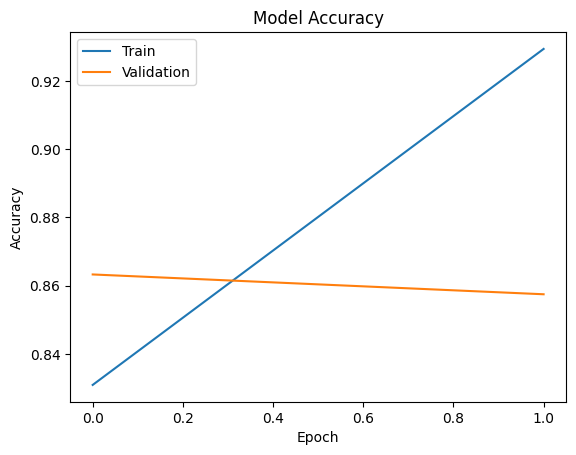

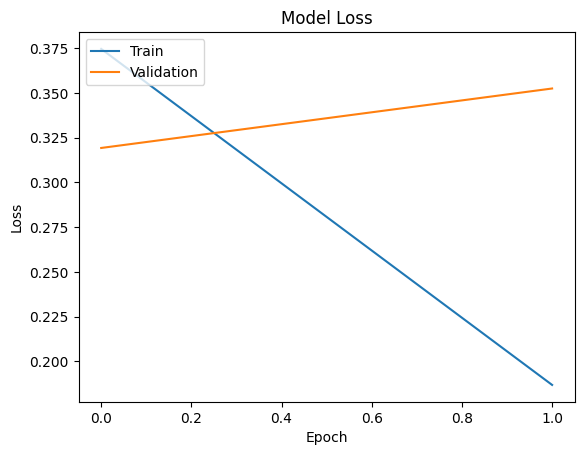

In [ ]:
!pip install keras numpy scipy
!pip install keras_preprocessing

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, f1_score

# Load dataset from CSV file
df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')

# Preprocess dataset
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['review'])
X = tokenizer.texts_to_sequences(df['review'])
X = pad_sequences(X, maxlen=100)
y = np.array(df['sentiment'].replace({'positive': 1, 'negative': 0}))

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile and train model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test), validation_split=0.1)


# Evaluate model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Plot accuracy and loss over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
